<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 163.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 159.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 153.9 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
## Write your code here
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

# Drop rows if any of the critical columns have missing values
#df = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])

for col in ['Employment', 'JobSat', 'RemoteWork']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
#Verify Missing Values Are Managed    
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_300/1367803542.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


count    51610.000000
mean        10.184344
std          9.109703
min          0.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro, dtype: float64
  ExperienceRange  JobSat
0             0-5     8.0
1            6-10     8.0
2           11-20     8.0
3             >20     8.0


/tmp/ipykernel_300/663712215.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_300/663712215.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat', palette='viridis')


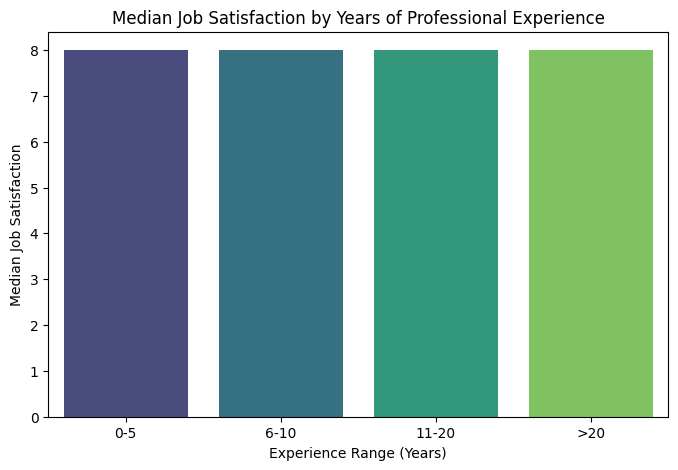

In [7]:
## Write your code here
# Replace text values with numbers
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

# Convert to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Summary
print(df['YearsCodePro'].describe())

#Create Experience Ranges
bins = [0, 5, 10, 20, df['YearsCodePro'].max()]
labels = ['0-5', '6-10', '11-20', '>20']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

#Calculate Median JobSat for Each Range
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)

#Visualize the Relationship
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat', palette='viridis')
plt.title('Median Job Satisfaction by Years of Professional Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


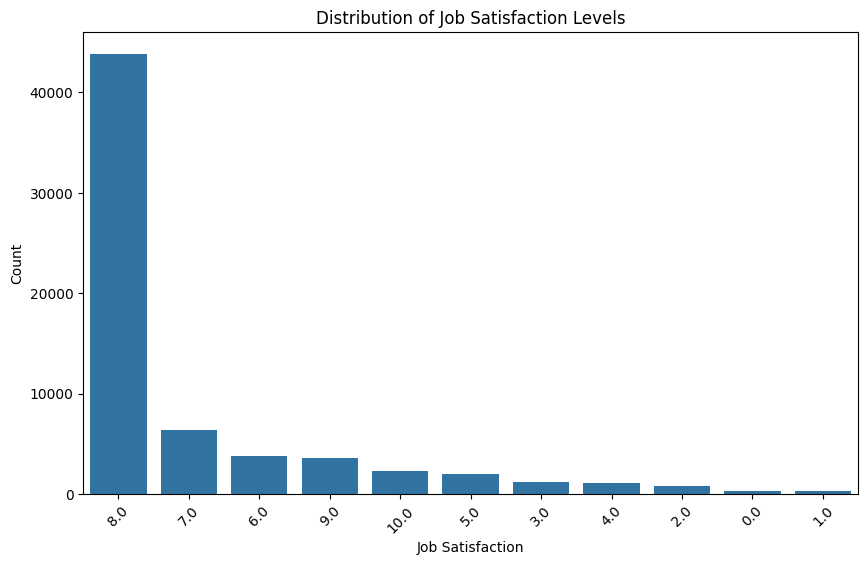

In [8]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for JobSat
plt.figure(figsize=(10,6))
sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index)

plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


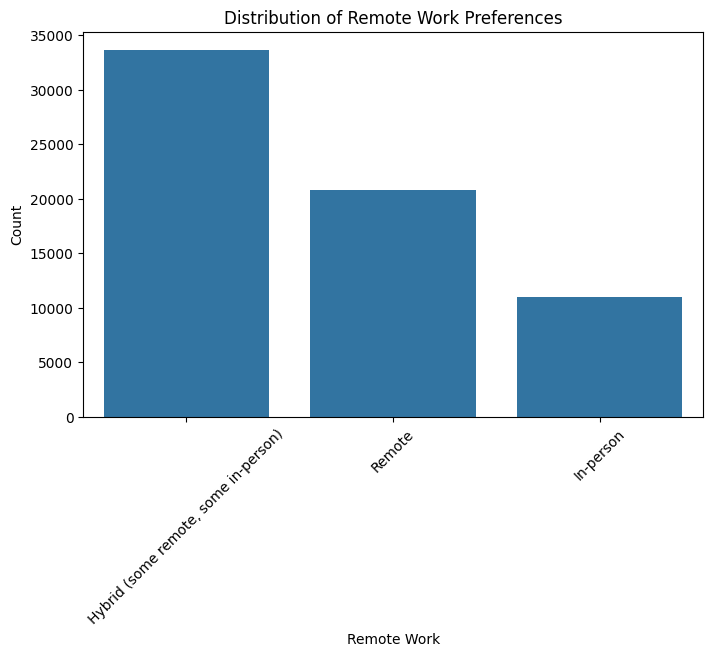

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                              

In [9]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for RemoteWork
plt.figure(figsize=(8,5))
sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index)

plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulation
remote_work_table = pd.crosstab(index=df['Employment'],
                                columns=df['RemoteWork'])

print(remote_work_table)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_300/908220778.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_langs = lang_counts.groupby('Country').apply(
/tmp/ipykernel_300/908220778.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Language', data=india_langs, palette='viridis')


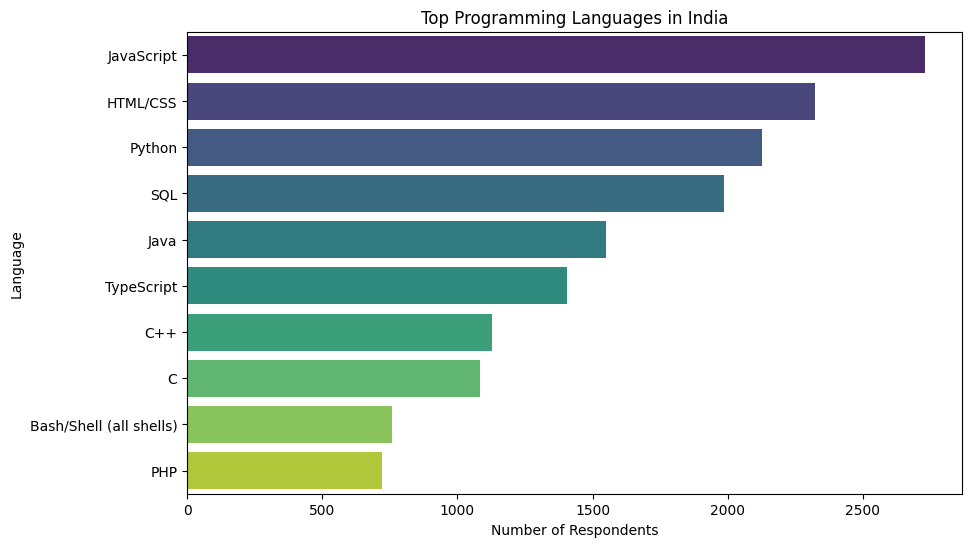

In [11]:
## Write your code here
# Example: Filter for a specific region or country
region_df = df[df['Country'] == 'India']  # Change "India" to your desired region

# Split the column into multiple rows
lang_df = df.dropna(subset=['LanguageHaveWorkedWith']).copy()
lang_df = lang_df.assign(Language=lang_df['LanguageHaveWorkedWith'].str.split(';'))
lang_df = lang_df.explode('Language')
lang_df['Language'] = lang_df['Language'].str.strip()

#Group by region and count
lang_counts = lang_df.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Example: Top 5 per region
top_langs = lang_counts.groupby('Country').apply(
    lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
import seaborn as sns
import matplotlib.pyplot as plt

#Bar plot for a single region
india_langs = lang_counts[lang_counts['Country'] == 'India'].sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Language', data=india_langs, palette='viridis')
plt.title('Top Programming Languages in India')
plt.xlabel('Number of Respondents')
plt.ylabel('Language')
plt.show()



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


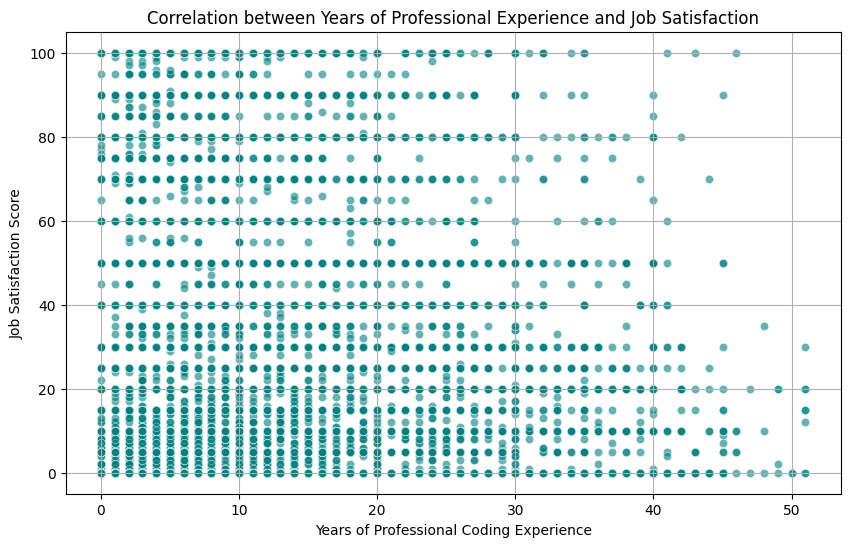

In [16]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Drop rows with missing relevant data
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

#Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='YearsCodePro', 
    y='JobSatPoints_1',
    data=df_clean,
    alpha=0.6,
    color='teal'
)
plt.title('Correlation between Years of Professional Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_300/649136280.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

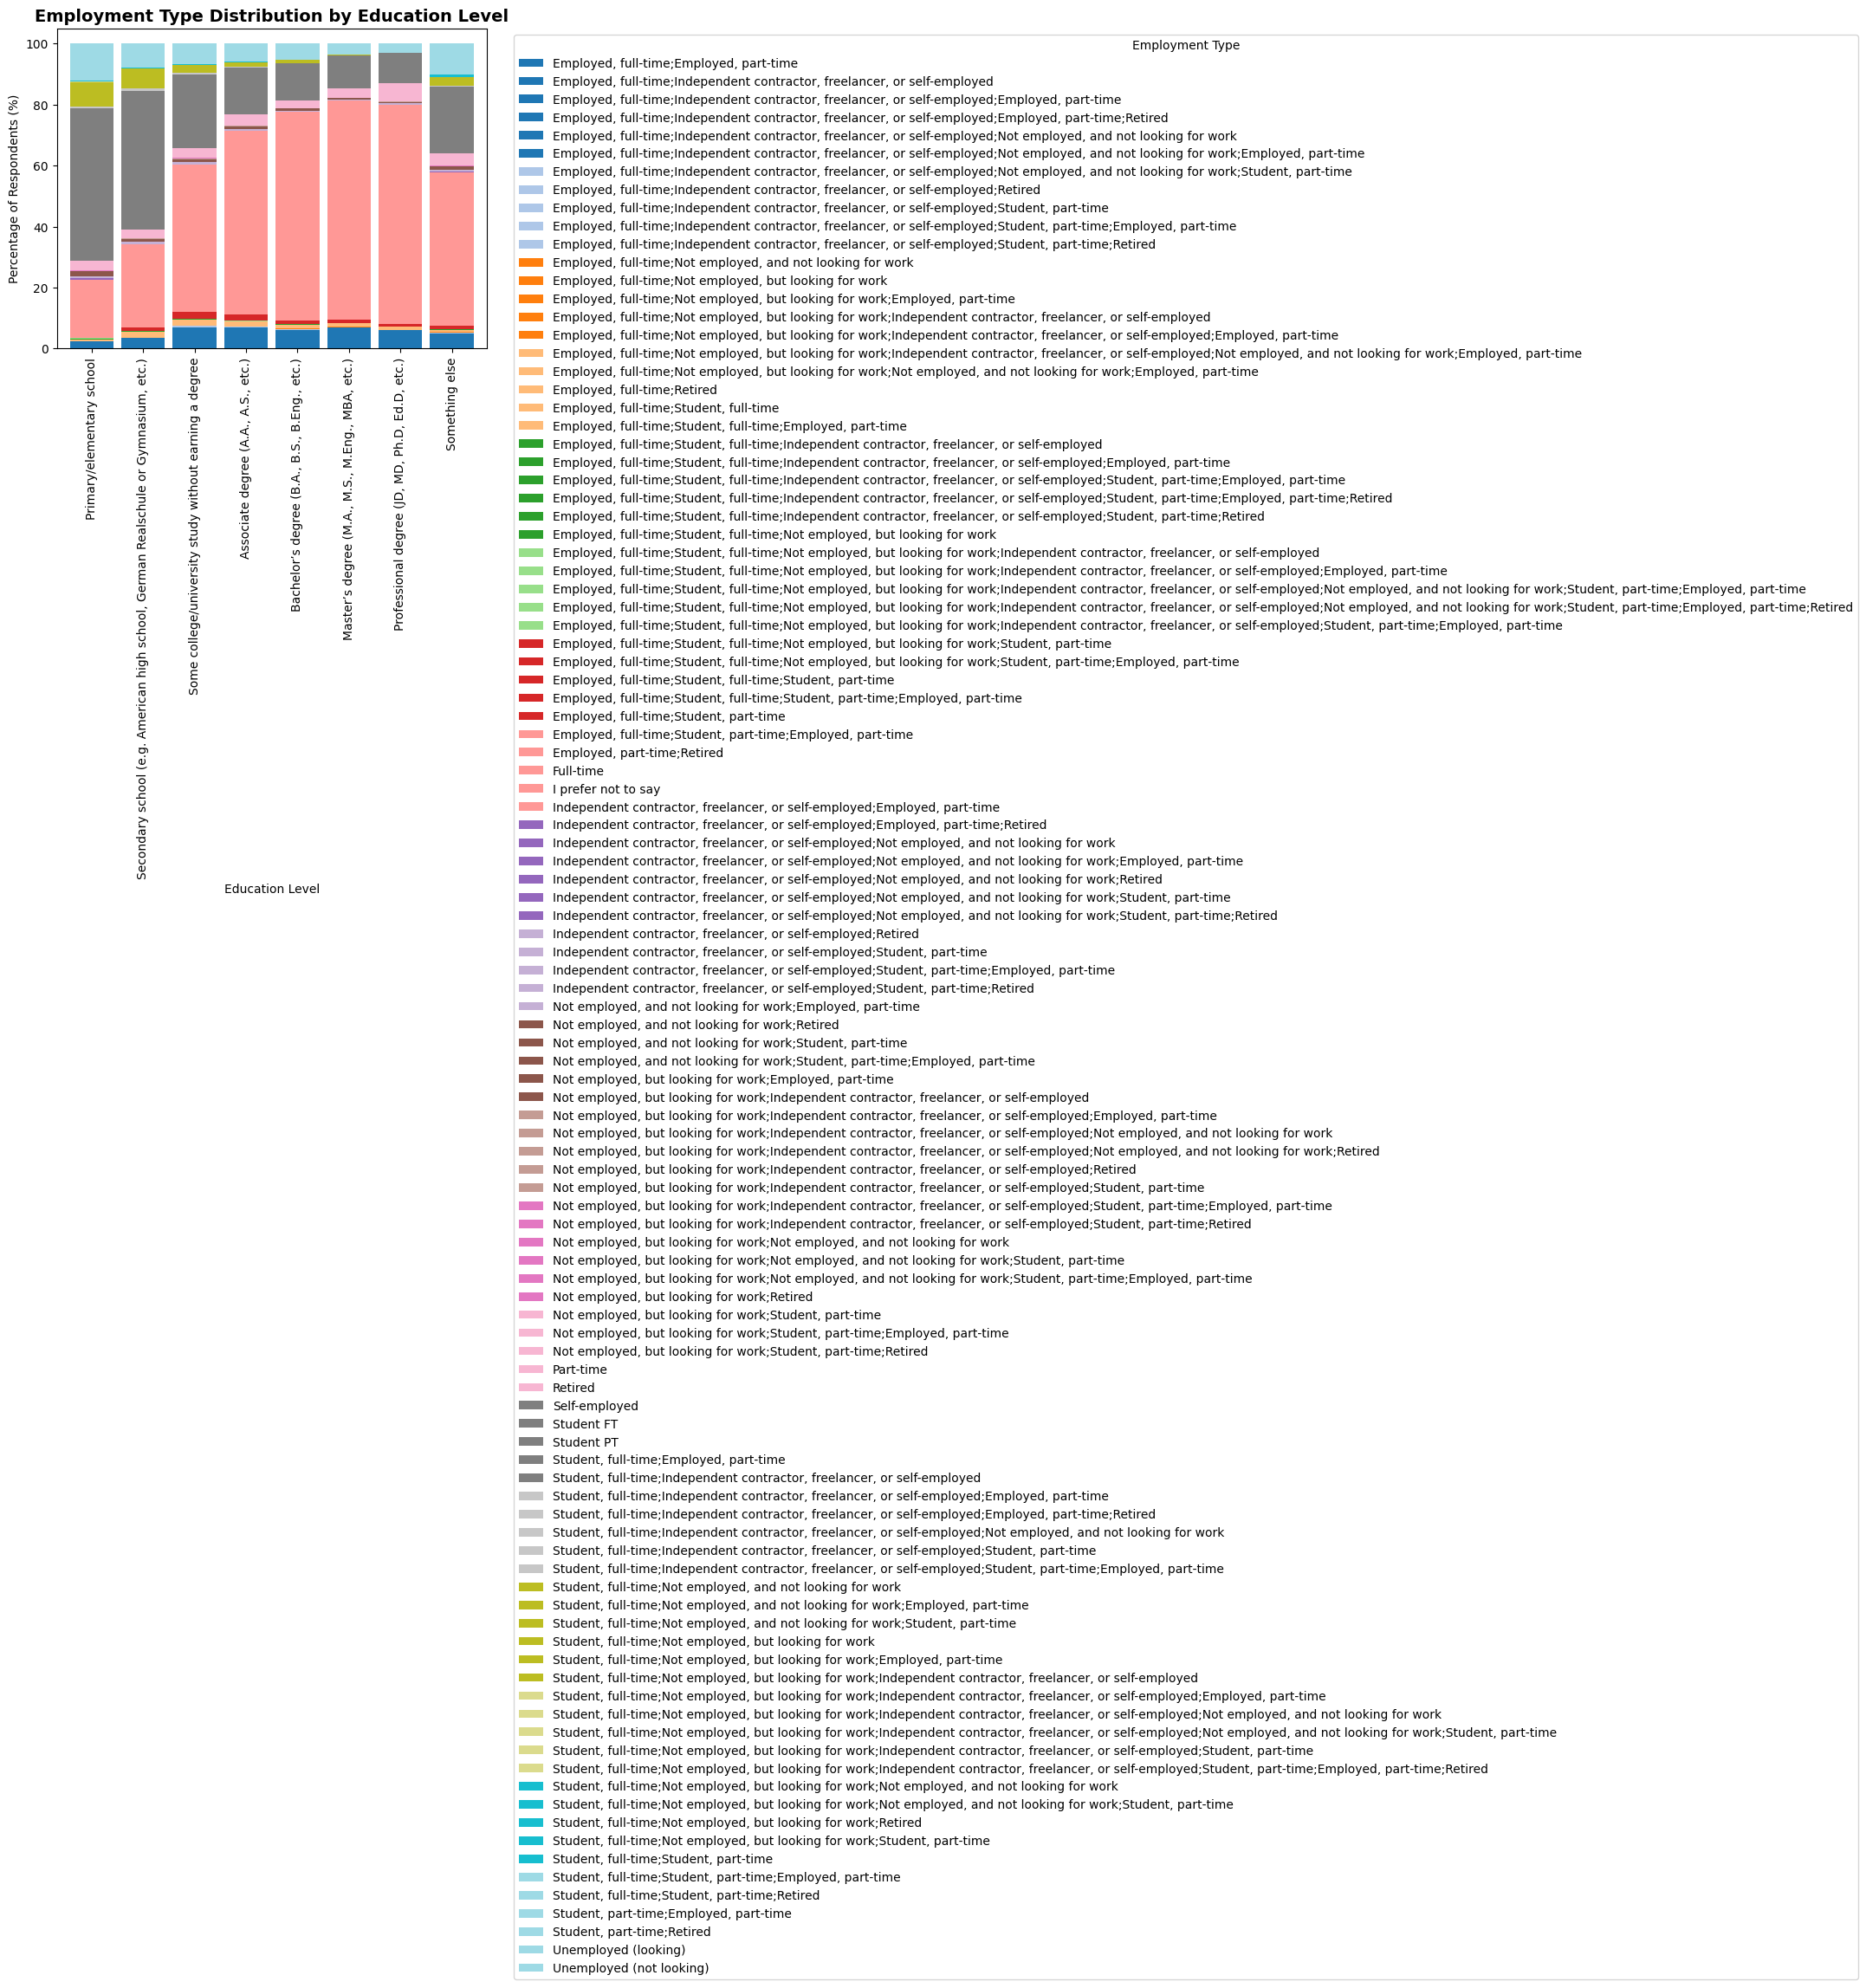

In [17]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Shorten Employment labels for readability
df['Employment'] = df['Employment'].replace({
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Not employed, but looking for work': 'Unemployed (looking)',
    'Not employed, and not looking for work': 'Unemployed (not looking)',
    'Retired': 'Retired',
    'Student, full-time': 'Student FT',
    'Student, part-time': 'Student PT'
})

# 2. Order Education levels logically
ed_order = [
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    "Associate degree (A.A., A.S., etc.)",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)",
    "Something else"
]
df['EdLevel'] = pd.Categorical(df['EdLevel'], categories=ed_order, ordered=True)

# 3. Cross-tabulation with percentages
ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100

# 4. Plot
plt.figure(figsize=(12, 6))
ct.plot(kind='bar', stacked=True, colormap='tab20', width=0.85)

plt.title("Employment Type Distribution by Education Level", fontsize=14, fontweight='bold')
plt.ylabel("Percentage of Respondents (%)")
plt.xlabel("Education Level")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('modified_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
